In [31]:
import pandas as pd
import numpy as np
from os import listdir

import geopandas as gpd
import folium
import matplotlib.pyplot as plt

from gradeit.gradeit import gradeit

%matplotlib inline

In [32]:
data_path = '/Users/rjacobs/Desktop/NREL/I02_3-0017_GroveCity/I02_3-0017_GroveCity_2017-3-10.csv'
#data_path = '/Users/rjacobs/Desktop/NREL/I02_3-0017_GroveCity/I02_3-0017_GroveCity_2017-3-1*.csv' # trips for one car

In [33]:
name_dict = {'time': {'Paccar': 'time [s]', 'fleetdna': 'time'},
            'file_desc': {'Paccar': 'test'},
            'truck': {'Paccar': 'truck'},
            'speed_km_per_hr': {'Paccar': 'WheelBasedVehicleSpeed [km/h]'},
            'latitude_degrees': {'Paccar': 'Latitude [degrees]'},
            'longitude_degrees': {'Paccar': 'Longitude [degrees]'},
            'altitude_m': {'Paccar': 'Altitude [meters]'},
            'weight_kg': {'Paccar': 'EST2_Out_Vehicle_Weight_kg [kg]'},
            'fuel_rate': {'Paccar': 'f_FuelMassFlow [g/s]'}}

In [34]:
fleetDNA = pd.read_csv(data_path)

In [35]:
fleetDNA.head()

,Datetime,time,BoxT,BoxV,gps_Time,gps_Lat,gps_Long,gps_NbSatellite,gps_Altitude,gps_Speed,...,EngSpeedAtPoint3,EngPercentTorqueAtPoint3,EngSpeedAtPoint4,EngPercentTorqueAtPoint4,EngSpeedAtPoint5,EngPercentTorqueAtPoint5,EngSpeedAtHighIdlePoint6,EngGainOfEndspeedGovernor,EngReferenceTorque,day_number
0,2017-03-10 07:41:02,0.0,30.759804,12.601727,52856.0,39.456615,-84.172173,9.0,286.299988,0.01,...,965.0,53.0,1050.0,68.0,1400.0,70.000000,1400.0,51.199219,3085.0,2
1,2017-03-10 07:41:03,1.0,30.882353,12.601727,52857.0,39.456615,-84.172173,9.0,286.299988,0.00,...,965.0,53.0,1050.0,68.0,1400.0,69.966667,1400.0,51.199219,3085.0,2
2,2017-03-10 07:41:04,2.0,30.759804,12.615059,52858.0,39.456615,-84.172173,9.0,286.299988,0.01,...,965.0,53.0,1050.0,68.0,1400.0,69.933333,1400.0,51.199219,3085.0,2
3,2017-03-10 07:41:05,3.0,30.882353,12.615059,52859.0,39.456615,-84.172173,9.0,286.299988,0.01,...,965.0,53.0,1050.0,68.0,1400.0,69.900000,1400.0,51.199219,3085.0,2
4,2017-03-10 07:41:06,4.0,31.004902,11.895136,52860.0,39.456615,-84.172173,8.0,286.299988,0.01,...,965.0,53.0,1050.0,68.0,1400.0,69.866667,1400.0,51.199219,3085.0,2


In [36]:
fleetDNA.Datetime

0        2017-03-10 07:41:02
1        2017-03-10 07:41:03
2        2017-03-10 07:41:04
3        2017-03-10 07:41:05
4        2017-03-10 07:41:06
                ...         
28011    2017-03-10 18:31:36
28012    2017-03-10 18:31:37
28013    2017-03-10 18:31:38
28014    2017-03-10 18:31:39
28015    2017-03-10 18:31:40
Name: Datetime, Length: 28016, dtype: object

In [47]:
output = fleetDNA[['gps_Altitude', # meters
            'gps_Lat',
            'gps_Long',
            'gps_Speed' ]] # km/hr, these units are from Maddy
output

,gps_Altitude,gps_Lat,gps_Long,gps_Speed
0,286.299988,39.456615,-84.172173,0.01
1,286.299988,39.456615,-84.172173,0.00
2,286.299988,39.456615,-84.172173,0.01
3,286.299988,39.456615,-84.172173,0.01
4,286.299988,39.456615,-84.172173,0.01
...,...,...,...,...
28011,209.800003,41.354519,-83.650734,0.01
28012,209.899994,41.354515,-83.650734,0.01
28013,209.899994,41.354515,-83.650734,0.02
28014,209.899994,41.354515,-83.650734,0.01


In [48]:
def make_hist(ndf, metric, title, themin, themax):
    ndf = ndf.replace([np.inf, -np.inf], np.nan)
    ndf.dropna(inplace=True)
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.hist(ndf[metric],30, edgecolor='k', alpha=0.6, range=[themin, themax])
    ax.set_xlim(themin, themax)
    ax.set_title(title,fontsize=16)
    ax.set_xlabel(title,fontsize=14)
    ax.set_ylabel('Count',fontsize=14)
    return fig, ax 

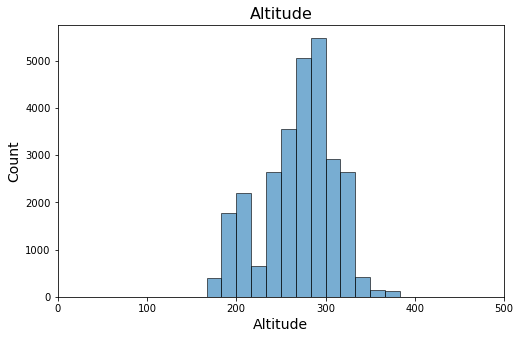

In [49]:
fig,ax = make_hist(summ, 'gps_Altitude', 'Altitude', 0, 500)

In [ ]:
data['lat'] = fleetDNA['gps_Lat']
data['lon'] = fleetDNA['gps_Long']

In [46]:
# choose source: elevation data
api = True
local = False

if local:
    db_path = "C:/Users/amahbub/Documents/gradeit_old/NED_13/"

# choose filter option
general_filter = True
sg_val = 5  # Desired SG window # use 0 for default value
# SG window value should be selected based on the data frame (df) size of the data spike. The user should first
# calculate the average vehicle speed [ft/s] = total_dist [ft]/total_df_size. Then the df_spike = spike_length[
# ft]/speed[ft/s]. default value: sg_window = factor*df_spike, where spike_length = 2500 ft and factor = 5 (in
# elevation.py).

In [ ]:
# choose bridge filter
bridge_filter = True
extension = 0.5  # in miles, extension around the edges of the bridge to be filtered
bridge_len = 2500  # in ft., minimum length of the bridge to be considered within the route
bridge_param = [extension, bridge_len, general_filter]

# choose plotting option
do_plot = True
plot_elevation = True
plot_grade = True
plot_param = np.append(plot_elevation, plot_grade)

# data saving
save_df = False

In [ ]:
def save_data(df):
    df.to_csv(r'file_name.csv', index=False)
    print("Data saved.")


if api:
    df_grade = gradeit(df=data, lat_col='lat', lon_col='lon', filtering=general_filter, source='usgs-api',
                       des_sg=sg_val)
elif local:
    df_grade = gradeit(df=data, lat_col='lat', lon_col='lon', filtering=general_filter, source='usgs-local',
                       usgs_db_path=db_path, des_sg=sg_val)
print(df_grade.head())

if bridge_filter:
    df_grade = gradeCorrection_bridge(df_grade, bridge_param)

# if do_plot:
#     plot_data(df_grade, general_filter, plot_param)

# if save_df:
#     save_data(df_grade)
# print("Process completed!")